# AIRFLIGHT PRICE PREDICTION

In [2]:
#import libararies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#loading the sample train data 
df_train = pd.read_csv('Xy_train_sample.csv')
df_train.shape

(5000, 14)

In [47]:
#loading the sample test data
df_test = pd.read_csv('X_test_sample.csv')
df_test.shape 

(500, 11)

In [5]:
#shortcut name
df = df_train

In [48]:
#shortcut name
df1 = df_test

# Exploratory Data Analysis on Train and test Data

## Data Information

In [6]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   Unnamed: 0.1  5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.2  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [49]:
# structure of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   f1          500 non-null    object 
 2   f2          500 non-null    object 
 3   f3          500 non-null    object 
 4   f4          500 non-null    object 
 5   f5          500 non-null    object 
 6   f6          500 non-null    object 
 7   f7          500 non-null    bool   
 8   f8          500 non-null    float64
 9   f9          500 non-null    int64  
 10  f10         500 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 39.7+ KB


## Missing Values

In [7]:
#finding null values
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [50]:
#finding null values
df1.isnull().sum()

Unnamed: 0    0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
dtype: int64

In [9]:
# see columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')

In [51]:
# see columns
df1.columns

Index(['Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10'],
      dtype='object')

In [10]:
# finding unique values in a categorical lists
cat_list = ['f2','f3','f6','f8','f9','f10']

# to find unique values in each columns
for i in cat_list:
    print(i,df[i].unique())
    print('.........................') # seperator line

f2 ['x']
.........................
f3 ['y']
.........................
f6 ['gamma' 'beta' 'alpha' 'omega']
.........................
f8 [20. 40. 15. 35.  0. 32. 45.]
.........................
f9 [1 0 2]
.........................
f10 ['c-6' 'b-1' 'c-2' 'a-7' 'a-9' 'a-5' 'a-1' 'a-23' 'b-69' 'c-4' 'b-19'
 'd-1' 'b-9' 'd-5' 'b-67' 'd-3' 'b-73' 'b-319' 'b-369']
.........................


- f2 ['x'] is always karachi =constant
- f3 ['y'] is always islamabad =constant
- f10 is Flight number = which have no dependency or corr with flight price.

In [11]:
# droping unnecessary colums from the data train
df.drop(['f2','f3','f10', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,10029546,2021-06-15 19:24:40.127223+00:00,2021-07-23 17:00:00+00:00,2021-07-23 18:59:00+00:00,gamma,True,20.0,1,10029546,6620.0
1,13732076,2021-07-10 02:33:39.966495+00:00,2021-07-13 05:00:00+00:00,2021-07-13 06:55:00+00:00,beta,True,40.0,0,13732076,15390.0
2,4670699,2021-04-17 01:56:55.252825+00:00,2021-04-19 05:00:00+00:00,2021-04-19 07:00:00+00:00,gamma,True,20.0,1,4670699,7640.0
3,20958556,2021-08-25 16:57:57.890080+00:00,2021-09-26 17:00:00+00:00,2021-09-26 18:59:00+00:00,gamma,True,20.0,2,20958556,7870.0
4,3558166,2021-03-19 19:43:50.090062+00:00,2021-04-13 17:00:00+00:00,2021-04-13 18:59:00+00:00,gamma,True,20.0,1,3558166,9800.0


In [52]:
# droping unnecessary colums from the data test
df1.drop(['f2','f3','f10', 'Unnamed: 0'], axis=1, inplace=True)
df1.head()

,f1,f4,f5,f6,f7,f8,f9
0,2021-09-05 19:35:42.081374+00:00,2021-09-09 16:00:00+00:00,2021-09-09 18:00:00+00:00,alpha,True,20.0,1
1,2021-09-10 07:03:14.090857+00:00,2021-09-19 11:00:00+00:00,2021-09-19 12:55:00+00:00,beta,True,40.0,0
2,2021-09-08 08:41:02.553645+00:00,2021-09-20 10:00:00+00:00,2021-09-20 12:00:00+00:00,alpha,True,15.0,1
3,2021-09-04 09:29:54.247387+00:00,2021-09-30 05:30:00+00:00,2021-09-30 07:30:00+00:00,gamma,True,20.0,2
4,2021-09-05 08:15:39.818464+00:00,2021-09-09 04:40:00+00:00,2021-09-09 06:40:00+00:00,omega,True,20.0,1


In [12]:
# droping unnecessary colums from the data train
df.drop(['Unnamed: 0.2','Unnamed: 0.1'], axis=1, inplace=True)

In [13]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-06-15 19:24:40.127223+00:00,2021-07-23 17:00:00+00:00,2021-07-23 18:59:00+00:00,gamma,True,20.0,1,6620.0
1,2021-07-10 02:33:39.966495+00:00,2021-07-13 05:00:00+00:00,2021-07-13 06:55:00+00:00,beta,True,40.0,0,15390.0
2,2021-04-17 01:56:55.252825+00:00,2021-04-19 05:00:00+00:00,2021-04-19 07:00:00+00:00,gamma,True,20.0,1,7640.0
3,2021-08-25 16:57:57.890080+00:00,2021-09-26 17:00:00+00:00,2021-09-26 18:59:00+00:00,gamma,True,20.0,2,7870.0
4,2021-03-19 19:43:50.090062+00:00,2021-04-13 17:00:00+00:00,2021-04-13 18:59:00+00:00,gamma,True,20.0,1,9800.0


## Type Casting / Conversion

In [14]:
# Type casting for train set
# convert time into datetime objects
from datetime import date, datetime
df['f1'] = pd.to_datetime(df['f1']) 
df['f4'] = pd.to_datetime(df['f4']) 
df['f5'] = pd.to_datetime(df['f5']) 

In [54]:
#Type casting for test set
# convert time into datetime objects
from datetime import date, datetime
df1['f1'] = pd.to_datetime(df1['f1']) 
df1['f4'] = pd.to_datetime(df1['f4']) 
df1['f5'] = pd.to_datetime(df1['f5']) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      500 non-null    datetime64[ns, UTC]
 1   f4      500 non-null    datetime64[ns, UTC]
 2   f5      500 non-null    datetime64[ns, UTC]
 3   f6      500 non-null    object             
 4   f7      500 non-null    bool               
 5   f8      500 non-null    float64            
 6   f9      500 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 24.1+ KB


- Type of time has been changed to datetime64[ns, UTC]

## Feature Engeenering

In [16]:
# adding new column after substractions *train

#creating time_to_dep in seconds
df.insert(0, 'time_to_dep(s)' , ((df['f4']-df['f1']).astype('timedelta64[s]')),True)

#creating travel_time in seconds
df.insert(1, 'travel_time(s)' , ((df['f5']-df['f4']).astype('timedelta64[s]')),True)

In [56]:
# adding new column after substractions *test

#creating time_to_dep in seconds 
df1.insert(0, 'time_to_dep(s)' , ((df1['f4']-df1['f1']).astype('timedelta64[s]')),True)

#creating travel_time in seconds
df1.insert(1, 'travel_time(s)' , ((df1['f5']-df1['f4']).astype('timedelta64[s]')),True)

In [17]:
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,3274519.0,7140.0,2021-06-15 19:24:40.127223+00:00,2021-07-23 17:00:00+00:00,2021-07-23 18:59:00+00:00,gamma,True,20.0,1,6620.0
1,267980.0,6900.0,2021-07-10 02:33:39.966495+00:00,2021-07-13 05:00:00+00:00,2021-07-13 06:55:00+00:00,beta,True,40.0,0,15390.0
2,183784.0,7200.0,2021-04-17 01:56:55.252825+00:00,2021-04-19 05:00:00+00:00,2021-04-19 07:00:00+00:00,gamma,True,20.0,1,7640.0
3,2764922.0,7140.0,2021-08-25 16:57:57.890080+00:00,2021-09-26 17:00:00+00:00,2021-09-26 18:59:00+00:00,gamma,True,20.0,2,7870.0
4,2150169.0,7140.0,2021-03-19 19:43:50.090062+00:00,2021-04-13 17:00:00+00:00,2021-04-13 18:59:00+00:00,gamma,True,20.0,1,9800.0


In [57]:
df1.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,332657.0,7200.0,2021-09-05 19:35:42.081374+00:00,2021-09-09 16:00:00+00:00,2021-09-09 18:00:00+00:00,alpha,True,20.0,1
1,791805.0,6900.0,2021-09-10 07:03:14.090857+00:00,2021-09-19 11:00:00+00:00,2021-09-19 12:55:00+00:00,beta,True,40.0,0
2,1041537.0,7200.0,2021-09-08 08:41:02.553645+00:00,2021-09-20 10:00:00+00:00,2021-09-20 12:00:00+00:00,alpha,True,15.0,1
3,2232005.0,7200.0,2021-09-04 09:29:54.247387+00:00,2021-09-30 05:30:00+00:00,2021-09-30 07:30:00+00:00,gamma,True,20.0,2
4,332660.0,7200.0,2021-09-05 08:15:39.818464+00:00,2021-09-09 04:40:00+00:00,2021-09-09 06:40:00+00:00,omega,True,20.0,1


## Visualization

In [18]:
#separating catagorical and numerical variables *train set

cat_cols = ['f6','f7','f8','f9']

num_cols = ['time_to_dep(s)', 'travel_time(s)']

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Azka\anaconda3\lib\site-p

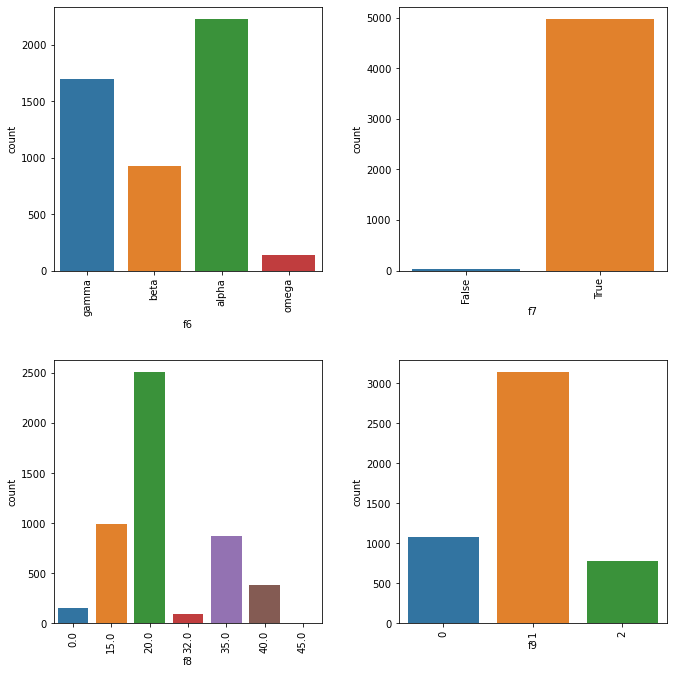

In [20]:
# plotting cat count plot
c=1
plt.figure(figsize= (10,10),facecolor=(1, 1, 1))
for i in cat_cols:
    plt.subplot(2,2,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c= c+1
plt.show()

- We can visually explore the catagorical variables here and understand their insights.
1. Airline alpha is most used airline while omega is the least one.
2. Refundable tickets are attractive while non refundable tickets are likely less purchased.
3. 20 kg baggage is most common while very rare pepole carry no baggage or upto 45kg baggage.
4. one piece bagggage is common while some carry no bag or 2 bags.

## Check Normal Distribution

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Azka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


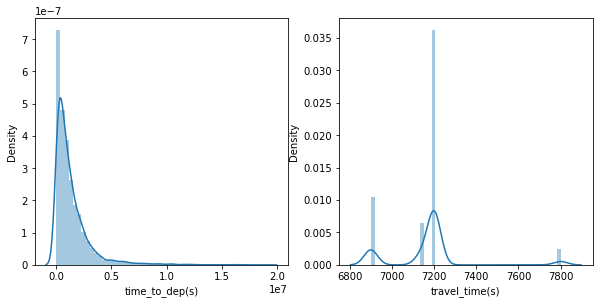

In [21]:
# plotting numerical count plot
c=1
plt.figure(figsize=(10,10),facecolor=(1, 1, 1))
for i in num_cols:
    plt.subplot(2,2,c)
    sns.distplot(df[i])
    c= c+1
plt.show()

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

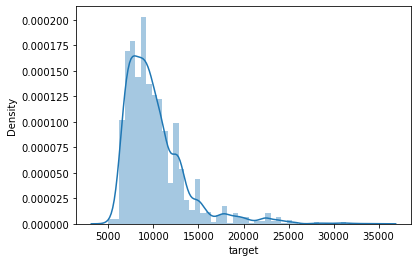

In [22]:
# target
sns.distplot(df.target)

- The target(Price) variable is looking positively skewed.

C:\Users\Azka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

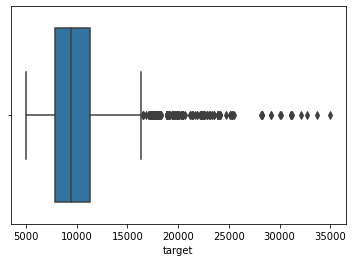

In [23]:
sns.boxplot(df['target'])

- The target(Price) variable have outliers after 17000 pkr.

In [24]:
# measure of skewness for all possible vars *train set
df.skew()

C:\Users\Azka\AppData\Local\Temp/ipykernel_11816/3319951774.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


time_to_dep(s)     3.462771
travel_time(s)     1.398727
f7               -11.829969
f8                 0.361096
f9                 0.029301
target             2.143744
dtype: float64

In [25]:
# measure of kurtosis for all possible vars *train set
df.kurtosis()

C:\Users\Azka\AppData\Local\Temp/ipykernel_11816/4194022645.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dep(s)     18.370107
travel_time(s)      5.142289
f7                138.003357
f8                 -0.071376
f9                 -0.308231
target              6.793502
dtype: float64

**Outliers Removal**
- Outliers as samples that are exceptionally far from the mainstream of the data. 
- Sometimes it's best to completely remove those records from your dataset to stop them from skewing your analysis.
- But here in this case; 
- My results are critical, minor changes will matter a lot.
- There are a lot of outliers, means that something is interesting going on with my data that I need to look further into.

In [27]:
# droping timeseries because our new features are enough to make sense now.
df.drop(['f1','f4','f5'], axis=1, inplace=True)

In [58]:
# droping timeseries because our new features are enough to make sense now.
df1.drop(['f1','f4','f5'], axis=1, inplace=True)

In [28]:
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
0,3274519.0,7140.0,gamma,True,20.0,1,6620.0
1,267980.0,6900.0,beta,True,40.0,0,15390.0
2,183784.0,7200.0,gamma,True,20.0,1,7640.0
3,2764922.0,7140.0,gamma,True,20.0,2,7870.0
4,2150169.0,7140.0,gamma,True,20.0,1,9800.0


In [59]:
df1.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,332657.0,7200.0,alpha,True,20.0,1
1,791805.0,6900.0,beta,True,40.0,0
2,1041537.0,7200.0,alpha,True,15.0,1
3,2232005.0,7200.0,gamma,True,20.0,2
4,332660.0,7200.0,omega,True,20.0,1


## Label Encoding

In [30]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#apply label encoder *train
df['f6']= le.fit_transform(df['f6'])
df['f7']= le.fit_transform(df['f7'])
df['f8']= le.fit_transform(df['f8'])

In [60]:
#apply label encoder  *test
df1['f6']= le.fit_transform(df1['f6'])
df1['f7']= le.fit_transform(df1['f7'])
df1['f8']= le.fit_transform(df1['f8'])

In [31]:
df.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
1889,2752748.0,7200.0,0,1,1,1,6810.0
3802,1740452.0,7200.0,0,1,4,1,9707.0
1142,903911.0,7200.0,0,1,4,1,12645.0
1048,808793.0,6900.0,1,1,2,0,6375.0
1669,377161.0,7140.0,2,1,2,2,9025.0
1195,1584937.0,7200.0,0,1,4,1,7124.0
3924,352919.0,7200.0,0,1,1,1,10006.0
2890,856057.0,7200.0,0,1,1,1,9045.0
3889,972446.0,7200.0,2,1,2,2,11900.0
4510,1963100.0,7200.0,2,1,2,1,7390.0


- At this point my data is clean and sensible.
- Now i can move further to see summary statistics and machine learning.

##  Basic Statistics

In [61]:
df1.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
count,5.000000e+02,500.000000,500.000000,500.0,500.000000,500.000000
mean,1.691862e+06,7142.400000,1.262000,0.0,1.006000,0.974000
std,2.006665e+06,112.079273,1.111678,0.0,0.578475,0.563879
min,5.829000e+03,6900.000000,0.000000,0.0,0.000000,0.000000
25%,3.394902e+05,7140.000000,0.000000,0.0,1.000000,1.000000
50%,9.884050e+05,7200.000000,1.000000,0.0,1.000000,1.000000
75%,2.204218e+06,7200.000000,2.000000,0.0,1.000000,1.000000
max,1.345503e+07,7200.000000,3.000000,0.0,2.000000,2.000000


In [33]:
#sklearn function to scale our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

- I will not scale my data because it is not needed here.

In [ ]:
# to apply sc on numerical cols
# df['time_to_dep(s)']= sc.fit_transform(df['time_to_dep(s)'])
# df['travel_time(s)']= sc.fit_transform(df['travel_time(s)'])
# df['target']= sc.fit_transform(df['target'])

- Let's assign X and y from the training set for ML Modeling.

## Splitting X and y

In [38]:
# assigning X and y 

X= df.drop(['target'],axis=1)
y= df['target']

In [39]:
X.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,3274519.0,7140.0,2,1,2,1
1,267980.0,6900.0,1,1,5,0
2,183784.0,7200.0,2,1,2,1
3,2764922.0,7140.0,2,1,2,2
4,2150169.0,7140.0,2,1,2,1


In [40]:
y.head()

0     6620.0
1    15390.0
2     7640.0
3     7870.0
4     9800.0
Name: target, dtype: float64

# ML Modelling

In [41]:
#regression pipeline or algos
#import ML libararies required

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

#for Root mean squared error
# rms= mean_absolute_error(y_test, y_pred, squared=False)

In [42]:
#shorten the names
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr= SVR()
knn= KNeighborsRegressor()

## Model Loop 4 Algorithms and their Scores

In [44]:
# design model loop without scaler with 20/80 test train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]:  # read all model
    i.fit(X_train, y_train)  # fitting all model
    pred = i.predict(X_test)  # predict
    test_score = r2_score(y_test, pred)  # test score
    train_score= r2_score(y_train, i.predict(X_train))  # train score
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is: ', r2_score(y_test, pred))
        print('Mean Absolute Error is ',mean_absolute_error(y_test,pred))
        print('Mean Squared Error is ',mean_squared_error(y_test,pred))
        print('RMSE is ',mean_squared_error(y_test,pred,squared=False))
        print('-------------------------------------')

LinearRegression()
R2 score is:  0.08952894651282606
Mean Absolute Error is  2207.4030516864686
Mean Squared Error is  10019788.28782259
RMSE is  3165.4049168822917
-------------------------------------
SVR()
R2 score is:  -0.02981969070926449
Mean Absolute Error is  2227.734475332809
Mean Squared Error is  11333227.164133154
RMSE is  3366.4858776078586
-------------------------------------


- **random_state=42**
- 42 is just a random number that helps to reproduce the same result after reuse the train_test_split. If we want, we can choose other numbers as well.
- Without setting a number to random state, we will get different results every time we run program.
- There's no optimal value for random seed, different pseudo random states produce different results. we may try a few and use the one which is suitable for specific problem. A simple trick is trying odd and even numbers.

- This upper loop is only giving out put for those algorithms which can be supposed on this moment, based on the condition '(train_score-test_score) <= 0.1' .
- We can choose one of them based on their individual scores mentioned in the output.
- We gonna choose Linear regression model here. 
- Now we will use the whole dataset in training and use the X-test data to predict y-test.

In [45]:
# design model loop without scaler with 30/70 test train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

for i in [lr, dt, svr, knn]:  # read all model
    i.fit(X_train, y_train)  # fitting all model
    pred = i.predict(X_test)  # predict
    test_score = r2_score(y_test, pred)  # test score
    train_score= r2_score(y_train, i.predict(X_train))  # train score
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is: ', r2_score(y_test, pred))
        print('Mean Absolute Error is ',mean_absolute_error(y_test,pred))
        print('Mean Squared Error is ',mean_squared_error(y_test,pred))
        print('RMSE is ',mean_squared_error(y_test,pred,squared=False))
        print('-------------------------------------')


LinearRegression()
R2 score is:  0.0756640772615449
Mean Absolute Error is  2272.80680793408
Mean Squared Error is  10964001.954023026
RMSE is  3311.1934334953953
-------------------------------------
SVR()
R2 score is:  -0.036826563365337295
Mean Absolute Error is  2284.0790197532992
Mean Squared Error is  12298308.64199475
RMSE is  3506.894444090776
-------------------------------------


- This upper loop is only giving out put for those algorithms which can be supposed on this moment, based on the condition '(train_score-test_score) <= 0.1' .
- We can choose one of them based on their individual scores mentioned in the output.
- We gonna choose Linear regression model here. 
- Now we will use the whole dataset in training and use the X-test data to predict y-test.

In [74]:
#final data prediction

lr= LinearRegression().fit(X,y)
pred= lr.predict(df1)


# to save prediction
res = pd.DataFrame(pred)
# res.index= X_test.index #its important for comparison
res.columns= ['prediction']
res.to_csv('predictionl.csv')

- Here are the results you can find in saved csv file in the same folder.

## Another way of dealing with time series

In [75]:
#loading the sample data 
df_train = pd.read_csv('Xy_train_sample.csv')
df_train.shape

(5000, 14)

In [77]:
df3= df_train
df3.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,10029546,10029546,2021-06-15 19:24:40.127223+00:00,x,y,2021-07-23 17:00:00+00:00,2021-07-23 18:59:00+00:00,gamma,True,20.0,1,c-6,10029546,6620.0
1,13732076,13732076,2021-07-10 02:33:39.966495+00:00,x,y,2021-07-13 05:00:00+00:00,2021-07-13 06:55:00+00:00,beta,True,40.0,0,b-1,13732076,15390.0
2,4670699,4670699,2021-04-17 01:56:55.252825+00:00,x,y,2021-04-19 05:00:00+00:00,2021-04-19 07:00:00+00:00,gamma,True,20.0,1,c-2,4670699,7640.0
3,20958556,20958556,2021-08-25 16:57:57.890080+00:00,x,y,2021-09-26 17:00:00+00:00,2021-09-26 18:59:00+00:00,gamma,True,20.0,2,c-6,20958556,7870.0
4,3558166,3558166,2021-03-19 19:43:50.090062+00:00,x,y,2021-04-13 17:00:00+00:00,2021-04-13 18:59:00+00:00,gamma,True,20.0,1,c-6,3558166,9800.0


In [79]:
# delta column tells time in days hrs mins an sec, oh how much time before departure ticket is purchased.

data_format_str = '%Y/%m/%d %H:%M:%S.%f'

df3['f1']= pd.to_datetime(df3['f1'])
df3['f4']= pd.to_datetime(df3['f4'])

f1= pd.to_datetime(df3['f1'],data_format_str)
f4= pd.to_datetime(df3['f4'],data_format_str)

diff = f4-f1
df3['delta']= diff

In [80]:
#have a look we hv delta
df3.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target,delta
0,10029546,10029546,2021-06-15 19:24:40.127223+00:00,x,y,2021-07-23 17:00:00+00:00,2021-07-23 18:59:00+00:00,gamma,True,20.0,1,c-6,10029546,6620.0,37 days 21:35:19.872777
1,13732076,13732076,2021-07-10 02:33:39.966495+00:00,x,y,2021-07-13 05:00:00+00:00,2021-07-13 06:55:00+00:00,beta,True,40.0,0,b-1,13732076,15390.0,3 days 02:26:20.033505
2,4670699,4670699,2021-04-17 01:56:55.252825+00:00,x,y,2021-04-19 05:00:00+00:00,2021-04-19 07:00:00+00:00,gamma,True,20.0,1,c-2,4670699,7640.0,2 days 03:03:04.747175
3,20958556,20958556,2021-08-25 16:57:57.890080+00:00,x,y,2021-09-26 17:00:00+00:00,2021-09-26 18:59:00+00:00,gamma,True,20.0,2,c-6,20958556,7870.0,32 days 00:02:02.109920
4,3558166,3558166,2021-03-19 19:43:50.090062+00:00,x,y,2021-04-13 17:00:00+00:00,2021-04-13 18:59:00+00:00,gamma,True,20.0,1,c-6,3558166,9800.0,24 days 21:16:09.909938


In [81]:
# see the statistics summary
df3.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target,delta
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.00000,5000
mean,1.075704e+07,1.075704e+07,22.782400,0.940400,1.075704e+07,10175.82500,15 days 13:49:43.214624988
std,6.242796e+06,6.242796e+06,9.054582,0.607389,6.242796e+06,3462.78688,19 days 06:42:23.594830110
min,5.554000e+03,5.554000e+03,0.000000,0.000000,5.554000e+03,4990.00000,0 days 00:31:09.189974
25%,5.288046e+06,5.288046e+06,20.000000,1.000000,5.288046e+06,7870.00000,3 days 21:30:08.114749250
50%,1.074884e+07,1.074884e+07,20.000000,1.000000,1.074884e+07,9403.00000,9 days 21:31:30.758345500
75%,1.601012e+07,1.601012e+07,35.000000,1.000000,1.601012e+07,11285.00000,19 days 20:55:06.467473250
max,2.177172e+07,2.177172e+07,45.000000,2.000000,2.177172e+07,35000.00000,220 days 07:46:33.923620


- Delta Column is alternative of time_dep (s) column previously, but it tells duration in days and on format.
- The summary statistics tells alot about the data, depends on how you interpret them and make sense out of it.

## Another more way

In [83]:
# function to calculate time in hrs min sec

def convert(seconds):
    seconds= seconds % (24 * 3600)
    hour= seconds //3600
    seconds %= 3600
    minutes = seconds //60
    seconds %= 60
    return '%d:%02d:%02d' % (hour,minutes, seconds)

#column addition of this time

df['time_dep']= df['time_to_dep(s)'].apply(convert)
df['time_travel']= df['travel_time(s)'].apply(convert)

     
df.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target,time_dep,time_travel
2987,165432.0,7200.0,2,1,0,0,7700.0,21:57:12,2:00:00
2618,1069587.0,7200.0,2,1,2,2,11900.0,9:06:27,2:00:00
2543,1499326.0,6900.0,1,1,5,0,9160.0,8:28:46,1:55:00
1093,249113.0,7200.0,3,1,2,1,22300.0,21:11:53,2:00:00
4061,1671497.0,7200.0,0,1,1,1,9045.0,8:18:17,2:00:00
4984,558527.0,7200.0,0,1,1,1,6531.0,11:08:47,2:00:00
2235,15334.0,7140.0,2,1,2,2,11410.0,4:15:34,1:59:00
444,327048.0,7200.0,3,1,2,1,13450.0,18:50:48,2:00:00
3360,1323969.0,7200.0,0,1,1,1,7524.0,7:46:09,2:00:00
2991,586810.0,7200.0,0,1,4,1,14645.0,19:00:10,2:00:00


In [93]:
# summary statistics of numerical columns in df
df.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.345783e+06,7162.512000,0.951400,0.993000,2.339600,0.940400,10175.82500
std,1.665744e+06,176.870423,0.947427,0.083381,1.270824,0.607389,3462.78688
min,1.869000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.00000
25%,3.366078e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7870.00000
50%,8.550905e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.00000
75%,1.716906e+06,7200.000000,2.000000,1.000000,4.000000,1.000000,11285.00000
max,1.903599e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,35000.00000


In [97]:
#minimun and maximun time of travel duration
print('minimun time travelled ' ,df['time_travel'].min() ,'--------', 'maximun time travelled ',df['time_travel'].max())


minimun time travelled  1:55:00 -------- maximun time travelled  2:10:00


In [98]:
#minimun and maximun time of of ticket purchase before departing
print('minimun time ticket purchase before departing ' ,df['time_dep'].min() ,'--------', 'maximun time ticket purchase before departing ',df['time_dep'].max())

minimun time ticket purchase before departing  0:00:03 -------- maximun time ticket purchase before departing  9:59:51


- The summary statistics tells alot about the data, depends on how you interpret them and make sense out of it.